Bibliotecas:

- pandas
- datetime
- matplotlib
- numpy


 Puxar cotações e afins:

- pandas_datareader
- yfinance

In [47]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

### Importe de  arquivo .xlsx de carteira de investimentos.

In [48]:
df_carteira = pd.read_excel(r"C:\Projetos\Dados\analise-carteira-investimento\Carteira.xlsx")

## display(df_carteira)

### Definição de período de análise 

In [49]:
data_inicial = datetime.now() - timedelta(days=30)
data_final   = datetime.now()

print(data_inicial, data_final)

2023-11-04 14:02:02.698422 2023-12-04 14:02:02.698422


## Coleta Automática de Dados: O sistema busca automaticamente dados históricos de preços de ações e do Índice BOVESPA, eliminando a necessidade de entrada manual.

In [50]:
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)['Adj Close']
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2023-11-06    118487.000000
2023-11-07    119268.000000
2023-11-08    119099.000000
2023-11-09    119012.000000
2023-11-10    120636.000000
2023-11-13    120376.000000
2023-11-14    123328.000000
2023-11-16    124576.000000
2023-11-17    125062.000000
2023-11-20    126095.000000
2023-11-21    125607.000000
2023-11-22    126035.000000
2023-11-23    126576.000000
2023-11-24    125542.000000
2023-11-27    125683.000000
2023-11-28    126538.000000
2023-11-29    126101.000000
2023-11-30    127331.000000
2023-12-01    128103.000000
2023-12-04    126986.257812
Name: Adj Close, dtype: float64

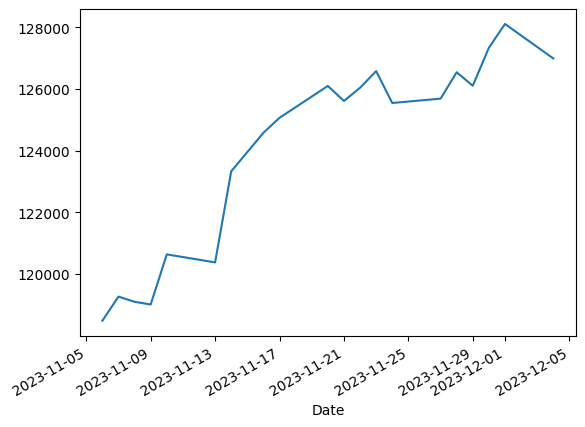

In [51]:
df_ibov.plot()
plt.show()

### Padronizando cotações e preenchedo valores vazios

In [52]:
lista_ativos = list(df_carteira['Ativos'].astype(str)+ '.SA')
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)['Adj Close']
display(df_cotacoes)

[*********************100%%**********************]  13 of 13 completed


,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-11-06,14.742839,67.639999,114.809998,32.209999,11.42,28.174250,160.149994,1.43,9.57,13.070000,98.250000,101.180000,108.150002
2023-11-07,15.132384,67.349998,115.669998,32.759998,11.74,28.963808,162.100006,1.77,9.85,13.650000,100.599998,100.750000,109.000000
2023-11-08,15.212292,67.820000,115.519997,33.590000,11.49,29.093737,161.619995,1.78,10.00,13.560000,101.099998,100.400002,108.989998
2023-11-09,15.242257,67.379997,115.180000,32.599998,11.51,29.223663,161.880005,1.71,10.14,13.450000,99.709999,100.019997,108.900002
2023-11-10,15.022512,67.360001,117.010002,34.000000,11.84,29.573467,161.059998,1.80,10.78,13.940000,102.089996,99.250000,107.870003
2023-11-13,14.722861,67.370003,116.820000,33.389999,11.75,29.373579,159.850006,1.73,10.49,13.900000,101.680000,99.000000,107.949997
2023-11-14,15.032501,67.699997,119.610001,34.119999,12.30,29.813334,161.009995,1.75,11.08,14.300000,104.750000,98.470001,108.000000
2023-11-16,15.551896,67.980003,120.959999,34.029999,12.85,30.293064,161.720001,2.19,11.28,14.940000,106.199997,98.349998,108.150002
2023-11-17,15.412060,67.910004,121.099998,33.360001,12.84,30.432987,161.860001,2.22,10.98,15.260000,105.800003,98.620003,108.480003


In [53]:
df_cotacoes.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2023-11-06 to 2023-12-04
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   20 non-null     float64
 1   BCRI11.SA  20 non-null     float64
 2   BOVA11.SA  20 non-null     float64
 3   BPAC11.SA  20 non-null     float64
 4   ENEV3.SA   20 non-null     float64
 5   ITUB4.SA   20 non-null     float64
 6   KNRI11.SA  20 non-null     float64
 7   MGLU3.SA   20 non-null     float64
 8   MOVI3.SA   20 non-null     float64
 9   NTCO3.SA   20 non-null     float64
 10  SMAL11.SA  20 non-null     float64
 11  VILG11.SA  20 non-null     float64
 12  XPLG11.SA  20 non-null     float64
dtypes: float64(13)
memory usage: 2.2 KB


In [54]:
df_cotacoes = df_cotacoes.ffill()

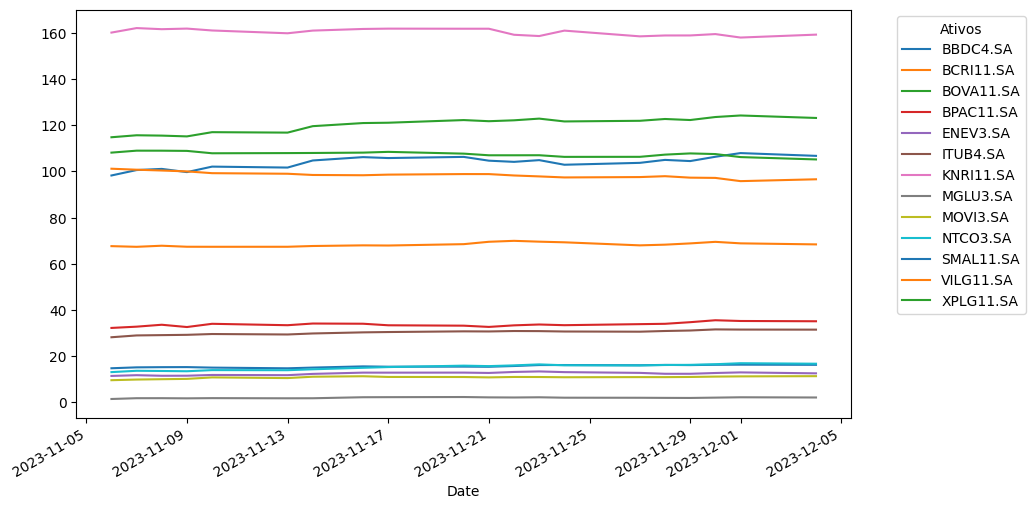

In [59]:
ax = df_cotacoes.plot(figsize=(10, 6))
ax.legend(title='Ativos', bbox_to_anchor=(1.05, 1), loc='upper left')


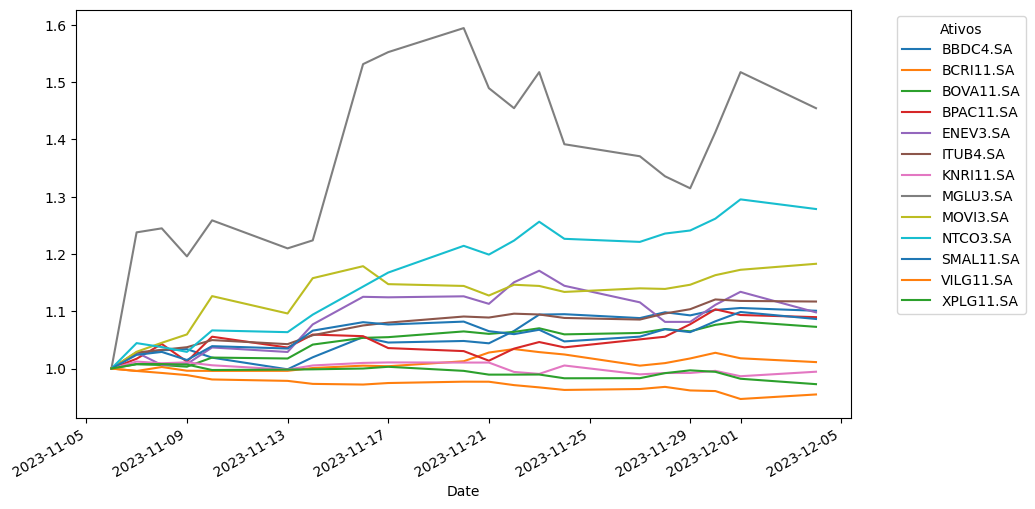

In [66]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
axx = df_cotacoes_norm.plot(figsize=(10, 6))
axx.legend(title='Ativos', bbox_to_anchor=(1.05, 1), loc='upper left')
